# cuSpatial Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [51]:
import cudf
import cuspatial
import numpy as np
import math
import cupy as cp

#### cuspatial.io.shapefile.read_polygon_shapefile

In [132]:
ring, poly_idx, polygons = cuspatial.io.shapefile.read_polygon_shapefile('../data/gadm36_USA_1.shp')

In [133]:
ring ### 50 states

0        0
1       23
2     4174
3     4175
4     4176
5     4226
6     4227
7     4273
8     4281
9     4282
10    5427
11    5494
12    5524
13    5525
14    5526
15    5527
16    5528
17    5529
18    5531
19    6376
20    7072
21    7164
22    7242
23    7248
24    7249
25    7280
26    7281
27    7282
28    7283
29    7284
30    7295
31    7417
32    7418
33    7550
34    7758
35    7759
36    7765
37    7766
38    7828
39    7829
40    7838
41    7990
42    7991
43    7992
44    8251
45    8252
46    8253
47    8372
48    8522
49    8523
50    8524
Name: f_pos, dtype: int32

In [134]:
poly_idx ### start point for each state in polygons

0             0
1            70
2           109
3           142
4           318
         ...   
8520    2134539
8521    2135069
8522    2135834
8523    2140273
8524    2142827
Name: r_pos, Length: 8525, dtype: int32

In [135]:
polygons = polygons.rename(columns={'x': 'longitude', 'y': 'latitude'})

In [136]:
def degrees_to_2d(lon_in, lat_in, x, y):
    for i, (lon, lat) in enumerate(zip(lon_in, lat_in)):
        x[i] = lon * 20037508.34 / 180
        temp = math.log(math.tan((90 + lat) * math.pi / 360)) / (math.pi / 180)
        y[i] = temp * 20037508.34 / 180
        
polygons = polygons.apply_rows(
      degrees_to_2d
    , incols = {'longitude': 'lon_in', 'latitude': 'lat_in'}
    , outcols = {'x': np.float64, 'y': np.float64}
    , kwargs = {}
)

polygons['line'] = cp.random.randint(10,240, len(polygons))
polygons = polygons.query(
        'longitude > -130'
        ' and longitude < 70'
        ' and latitude < 50'
    )

In [137]:
# Overloading Datashader functions
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Hot

cvs = ds.Canvas(plot_width=950, plot_height=625)
agg = cvs.points(polygons, 'x', 'y', ds.mean('line')) # Perform aggregation
img = tf.shade(agg, cmap=['lightblue', 'darkblue'], how='eq_hist') # Produce image from aggregation

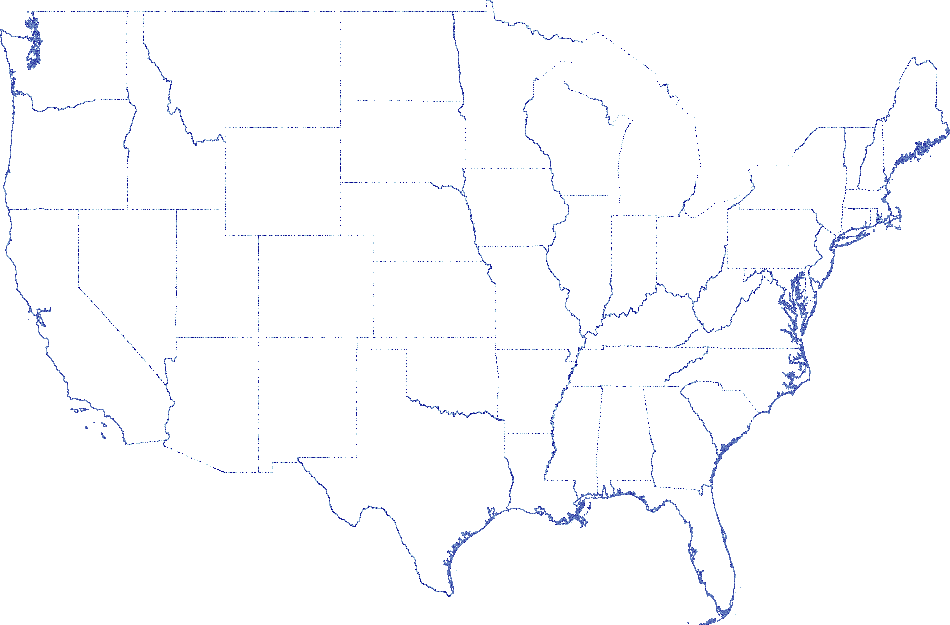

In [130]:
img

## Create geo spatial dataset

cuspatial.core.gis.directed_hausdorff_distance
cuspatial.core.gis.haversine_distance
cuspatial.core.gis.lonlat_to_cartesian
cuspatial.core.gis.point_in_polygon
cuspatial.core.gis.polygon_bounding_boxes
cuspatial.core.gis.polyline_bounding_boxes

cuspatial.core.indexing.quadtree_on_points
CubicSpline
CubicSpline.__init__
CubicSpline.__call__

cuspatial.core.spatial_window.points_in_spatial_window

cuspatial.core.spatial_join.join_quadtree_and_bounding_boxes
cuspatial.core.spatial_join.quadtree_point_in_polygon
cuspatial.core.spatial_join.quadtree_point_to_nearest_polyline

cuspatial.core.trajectory.derive_trajectories
cuspatial.core.trajectory.trajectory_bounding_boxes
cuspatial.core.trajectory.trajectory_distances_and_speeds

cuspatial.io.shapefile.read_polygon_shapefile